In [62]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import DTreeVizAPI 
from IPython.display import Image, display_svg, SVG

In [38]:
df = pd.read_csv('./train.csv')
df.columns

dep_var = 'Survived'


In [39]:
procs = [Categorify, FillMissing]



In [40]:
import numpy as np

def custom_log_loss(y_true, y_pred):
  epsilon = 1e-7  # Small value to prevent log(0) errors 
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions within 0 and 1
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss.mean() 


In [41]:
cond = (df.PassengerId < 600)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

df = pd.get_dummies(df, columns=['Sex'])

splits = (list(train_idx),list(valid_idx))

In [42]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

to = TabularPandas(df,procs,cat, cont, y_names=dep_var, splits=splits)

len(to.train),len(to.valid)

(599, 292)

In [43]:
to.show()

,Name,Ticket,Cabin,Embarked,Sex_female,Sex_male,Age_na,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,"Braund, Mr. Owen Harris",A/5 21171,#na#,S,False,True,False,1,3,22.0,1,0,7.250000,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",PC 17599,C85,C,True,False,False,2,1,38.0,1,0,71.283302,1
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,#na#,S,True,False,False,3,3,26.0,0,0,7.925000,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S,True,False,False,4,1,35.0,1,0,53.099998,1
4,"Allen, Mr. William Henry",373450,#na#,S,False,True,False,5,3,35.0,0,0,8.050000,0
5,"Moran, Mr. James",330877,#na#,Q,False,True,True,6,3,28.0,0,0,8.458300,0
6,"McCarthy, Mr. Timothy J",17463,E46,S,False,True,False,7,1,54.0,0,0,51.862499,0
7,"Palsson, Master. Gosta Leonard",349909,#na#,S,False,True,False,8,3,2.0,3,1,21.075001,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742,#na#,S,True,False,False,9,3,27.0,0,2,11.133300,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",237736,#na#,C,True,False,False,10,2,14.0,1,0,30.070801,1


In [44]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [45]:
m = DecisionTreeClassifier(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeClassifier(max_leaf_nodes=4)

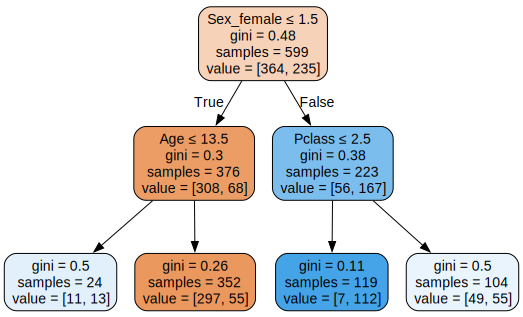

In [46]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [47]:
m = DecisionTreeClassifier()
m.fit(xs, y)


DecisionTreeClassifier()

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = m.predict(valid_xs)  # Replace 'model' with your trained model.
accuracy = accuracy_score(valid_y, y_pred) 
print("Accuracy:", accuracy)




Accuracy: 0.8287671232876712


In [54]:
cm = confusion_matrix(valid_y, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[161  24]
 [ 26  81]]


In [64]:
def rf(xs, y, n_estimators=40, max_samples=500,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [66]:
m = rf(xs, y)
y_pred = m.predict(valid_xs)  # Replace 'model' with your trained model.
accuracy = accuracy_score(valid_y, y_pred) 

print(accuracy)

0.8424657534246576
